In [7]:
## 绘制雷达图例子
devtools::install_github("JaseZiv/worldfootballR",force = TRUE)

bit   (4.0.4 -> 4.0.5) [CRAN]
vctrs (0.5.0 -> 0.5.1) [CRAN]


Installing 2 packages: bit, vctrs




  There are binary versions available but the source versions are later:
      binary source needs_compilation
bit    4.0.4  4.0.5              TRUE
vctrs  0.5.0  0.5.1              TRUE



installing the source packages 'bit', 'vctrs'


Warning message in i.p(...):
"installation of package 'bit' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'vctrs' had non-zero exit status"


* checking for file 'C:\Users\pc\AppData\Local\Temp\RtmpgBS14D\remotes9b817f863cd\JaseZiv-worldfootballR-8536d01/DESCRIPTION' ... OK
* preparing 'worldfootballR':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building 'worldfootballR_0.6.1.9000.tar.gz'



In [8]:
devtools::install_github("JaseZiv/worldfootballR")#安装包
library(worldfootballR)  #用于网页信息爬取
library(tidyverse)       #ggplot, dplyr等
library(forcats)         #ggplot排序
library(glue)            #比paste()更简单

Skipping install of 'worldfootballR' from a github remote, the SHA1 (8536d01a) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
df <- fb_player_scouting_report("https://fbref.com/en/players/282679b4/Mateusz-Klich", pos_versus = "primary")
head(df)
df <- df %>% 
      mutate(stat=case_when(Statistic == "Non-Penalty Goals"|
                            Statistic == "npxG"|
                            Statistic == "Shots Total"|
                            Statistic == "Assists"|
                            Statistic == "xA"|
                            Statistic == "npxG+xA"|
                            Statistic == "Shot-Creating Actions" ~ "Attacking",
                            Statistic == "Passes Attempted"|
                            Statistic == "Pass Completion %"|
                            Statistic == "Progressive Passes"|
                            Statistic == "Progressive Carries"|
                            Statistic == "Dribbles Completed"|
                            Statistic == "Touches (Att Pen)"|
                            Statistic == "Progressive Passes Rec" ~ "Possession",
                                 TRUE ~ "Defending"))
df_selected <- df[-c(6,14,15,16,18),]
df_selected <- df[c(1:5,7:13,17,19,20),]

In [15]:
df_selected

,Player,Versus,StatGroup,Statistic,Per90,Percentile,BasedOnMinutes,scouting_period,stat
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2...1,Mateusz Klich,Midfielders,Standard,Non-Penalty Goals,0.00,11,1717,Last 365 Days,Attacking
3...2,Mateusz Klich,Midfielders,Standard,Non-Penalty xG,0.13,74,1717,Last 365 Days,Defending
4...3,Mateusz Klich,Midfielders,Standard,Shots Total,1.57,83,1717,Last 365 Days,Attacking
5...4,Mateusz Klich,Midfielders,Standard,Assists,0.05,41,1717,Last 365 Days,Attacking
6...5,Mateusz Klich,Midfielders,Standard,xAG,0.09,51,1717,Last 365 Days,Defending
8...7,Mateusz Klich,Midfielders,Standard,Shot-Creating Actions,2.94,74,1717,Last 365 Days,Attacking
10...8,Mateusz Klich,Midfielders,Standard,Passes Attempted,45.45,37,1717,Last 365 Days,Possession
11...9,Mateusz Klich,Midfielders,Standard,Pass Completion %,77.50,26,1717,Last 365 Days,Possession
12...10,Mateusz Klich,Midfielders,Standard,Progressive Passes,3.09,37,1717,Last 365 Days,Possession


In [20]:
temp <- (360/(length(df_selected$Player))/2)                             #在标签间算出角度的差异并除以2
myAng <- seq(-temp, -360+temp, length.out = length(df_selected$Player))  #为标签算好角
ang<-ifelse(myAng < -90, myAng+180, myAng)                                    #为了可读性，在某些位置旋转标签
ang<-ifelse(ang < -90, ang+180, ang)      

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_bar()`)."


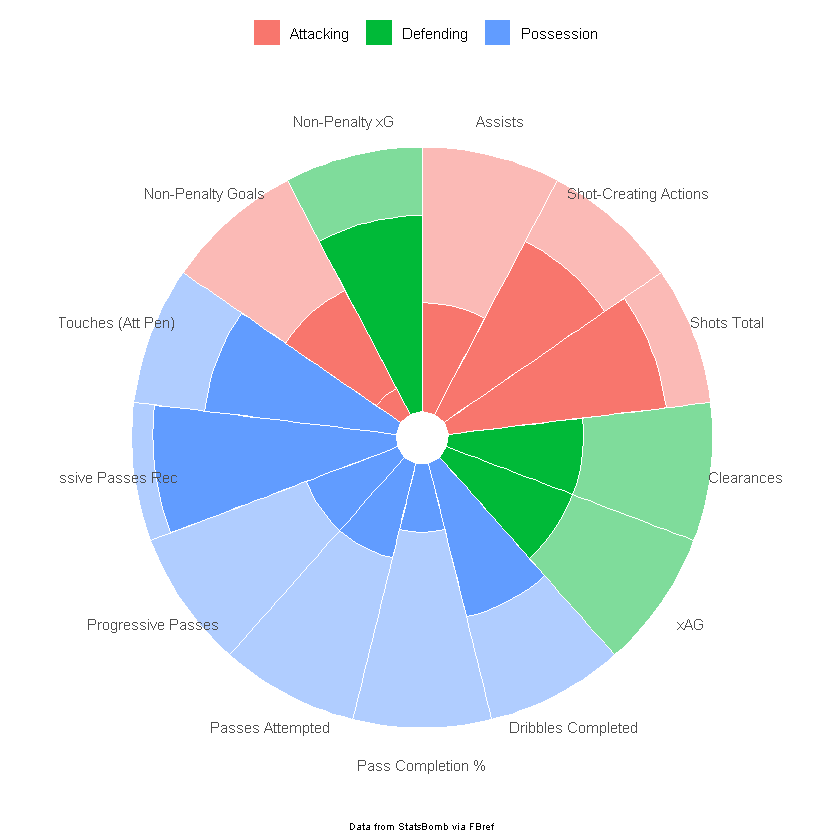

In [23]:
ggplot(df_selected,aes(fct_reorder(Statistic,stat),Percentile)) +                       #选择绘图列并按照分类排序
  geom_bar(aes(y=100,fill=stat),stat="identity",width=1,colour="white",                 #先绘制整个披萨图
  alpha=0.5) +                                                                          #改变透明度
  geom_bar(stat="identity",width=1,aes(fill=stat),colour="white") +                     #插入数值
  coord_polar() +                                                                       #变成圆形
  #geom_label(aes(label=Per.90,fill=stat),size=2,color="white",show.legend = FALSE)+     #为数值加标签，把'label=Per.90' 变成'label=Percentile' 以展示百分比 scale_fill_manual(values=c("Possession" = "#D70232",#选择披萨图的填充颜色"Attacking" = "#1A78CF","Defending" = "#FF9300")) +                                                              
  scale_y_continuous(limits = c(-10,100))+                                              #在中间添加白色圆圈  
  labs(fill="",                                                                         #去掉图例标题
       caption = "Data from StatsBomb via FBref",                                        #标题
       title=df_selected$player_name[1])+                                               #标题为运动员的名字 
  theme_minimal() +                                                                     #主题进行调整 
  theme(legend.position = "top",
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.y = element_blank(),
        plot.title = element_text(hjust=0.5),
        plot.caption = element_text(hjust=0.5,size=6),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) 

In [61]:
temp <- (360/(12)/2)                             #在标签间算出角度的差异并除以2
myAng <- seq(-temp, -360+temp, length.out = 12)  #为标签算好角
ang<-ifelse(myAng < -90, myAng+180, myAng)                                    #为了可读性，在某些位置旋转标签
    

In [60]:
ang

[1]  -15  -45  -75   75   45   15  -15  -45  -75 -105 -135 -165

In [25]:
df_selected$Statistic <- gsub(" ","\n",df_selected$Statistic)

In [34]:
df_selected

,Player,Versus,StatGroup,Statistic,Per90,Percentile,BasedOnMinutes,scouting_period,stat
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2...1,Mateusz Klich,Midfielders,Standard,Non-Penalty Goals,0.00,11,1717,Last 365 Days,Attacking
3...2,Mateusz Klich,Midfielders,Standard,Non-Penalty xG,0.13,74,1717,Last 365 Days,Defending
4...3,Mateusz Klich,Midfielders,Standard,Shots Total,1.57,83,1717,Last 365 Days,Attacking
5...4,Mateusz Klich,Midfielders,Standard,Assists,0.05,41,1717,Last 365 Days,Attacking
6...5,Mateusz Klich,Midfielders,Standard,xAG,0.09,51,1717,Last 365 Days,Defending
8...7,Mateusz Klich,Midfielders,Standard,Shot-Creating Actions,2.94,74,1717,Last 365 Days,Attacking
10...8,Mateusz Klich,Midfielders,Standard,Passes Attempted,45.45,37,1717,Last 365 Days,Possession
11...9,Mateusz Klich,Midfielders,Standard,Pass Completion %,77.50,26,1717,Last 365 Days,Possession
12...10,Mateusz Klich,Midfielders,Standard,Progressive Passes,3.09,37,1717,Last 365 Days,Possession


ERROR: Error in check_factor(.f): object 'Statistic' not found


Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"ar

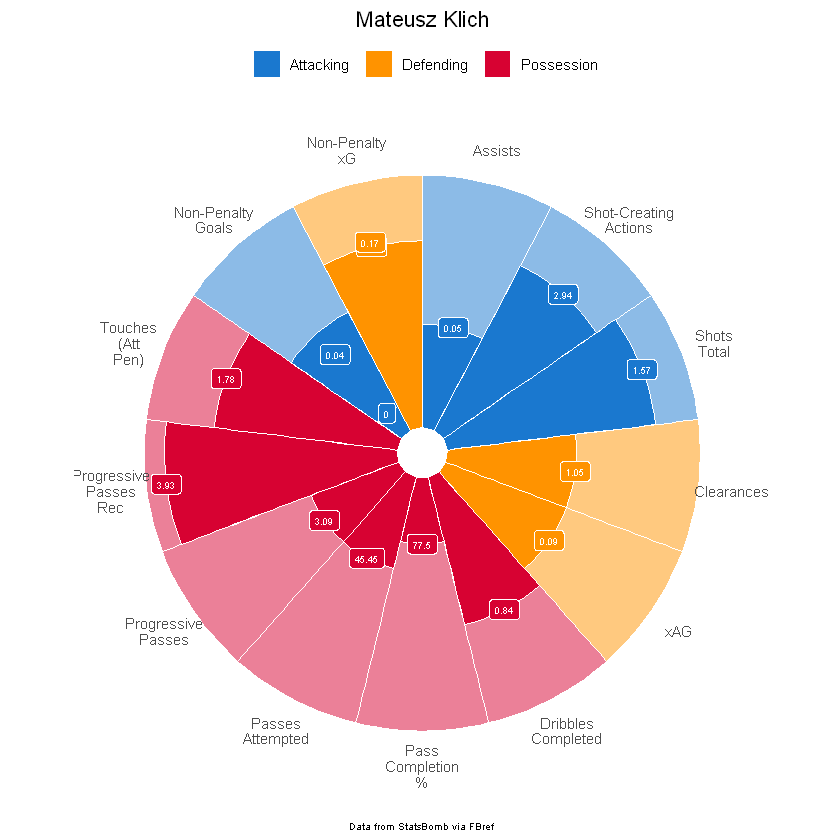

In [37]:
ggplot(df_selected,aes(fct_reorder(Statistic,stat),Percentile)) +                       
    geom_bar(aes(y=100,fill=stat),stat="identity",width=1,colour="white",                 
             alpha=0.5) +                                                                         
    geom_bar(stat="identity",width=1,aes(fill=stat),colour="white") +                  
    coord_polar() +                                                                      
    geom_label(aes(label=Per90,fill=stat),size=2,color="white",show.legend = FALSE)+     
    scale_fill_manual(values=c("Possession" = "#D70232",                                  
                               "Attacking" = "#1A78CF",
                               "Defending" = "#FF9300")) +                                                              
    scale_y_continuous(limits = c(-10,100))+                                             
    labs(fill="",                                                                       
         caption = "Data from StatsBomb via FBref",                                       
         title=df_selected$Player[1])+                                           
    theme_minimal() +                                                                   
    theme(legend.position = "top",
          axis.title.y = element_blank(),
          axis.title.x = element_blank(),
          axis.text.y = element_blank(),
          #axis.text.x = element_text(size = 6, angle = ang),
          plot.title = element_text(hjust=0.5),
          plot.caption = element_text(hjust=0.5,size=6),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) 

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
"ar

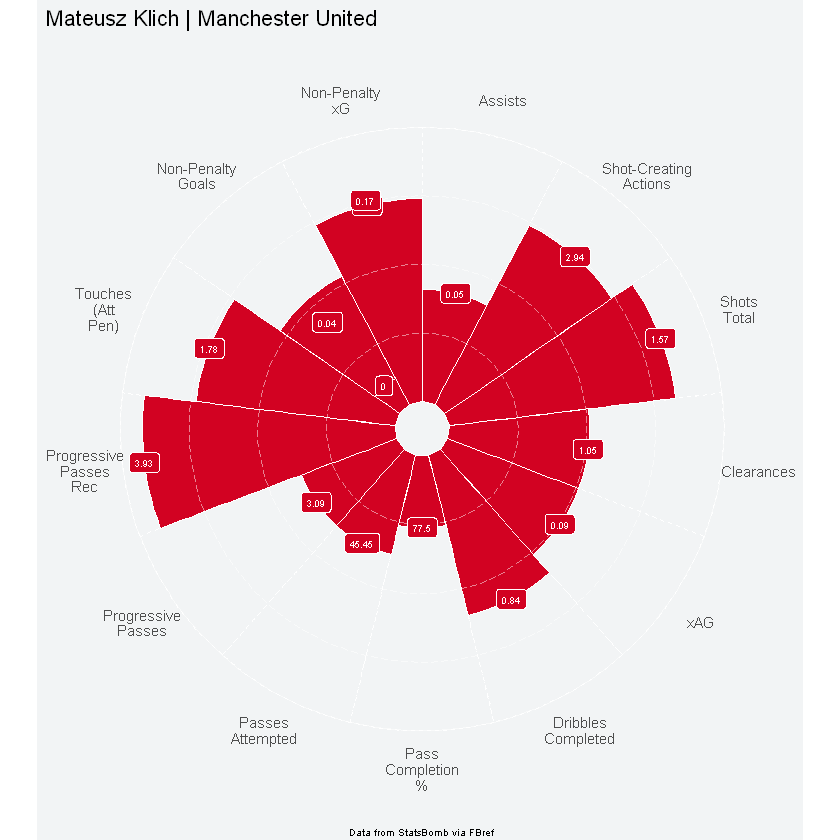

In [30]:
ggplot(df_selected,aes(fct_reorder(Statistic,stat),Percentile)) +                      
    geom_bar(aes(y=100),fill="#F2F4F5",stat="identity",width=1,colour="white",                
             alpha=1,linetype="dashed") +                                                                          
    geom_bar(stat="identity",width=1,fill="#D20222",colour="white") +   
    geom_hline(yintercept=25, colour="white",linetype="longdash",alpha=0.5)+
    geom_hline(yintercept=50, colour="white",linetype="longdash",alpha=0.5)+
    geom_hline(yintercept=75, colour="white",linetype="longdash",alpha=0.5)+ 
    geom_hline(yintercept=100, colour="white",alpha=0.5)+ 
    coord_polar() +                                                                     
    geom_label(aes(label=Per90),fill="#D20222",size=2,color="white",show.legend = FALSE)+     
    scale_fill_manual(values=c("Possession" = "#D70232",                                  
                               "Attacking" = "#1A78CF",
                               "Defending" = "#FF9300")) +                                                              
    scale_y_continuous(limits = c(-10,100))+                                              
    labs(fill="",   
         caption = "Data from StatsBomb via FBref",     
         #remove legend title
         title=glue("{df_selected$Player[1]} | Manchester United"),
         subtitle = glue::glue("{df_selected$season} | Compared to midfielders Top 5 competitions | stats per 90"))+                                               
    
    theme_minimal() +                                                                     
    theme(plot.background = element_rect(fill = "#F2F4F5",color = "#F2F4F5"),
          panel.background = element_rect(fill = "#F2F4F5",color = "#F2F4F5"),
          legend.position = "top",
          axis.title.y = element_blank(),
          axis.title.x = element_blank(),
          axis.text.y = element_blank(),
          #axis.text.x = element_text(size = 6, angle = ang),
          plot.subtitle = element_text(hjust=0.5,size=8),
          plot.caption = element_text(hjust=0.5,size=6),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          plot.margin = margin(5,2,2,2)) 

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

[1] "anther"      "ovule"       "root"        "radicle"     "leaf"       
 [6] "hypocotyl"   "cotyledon"   "stem"        "fiber_10DPA" "fiber_20DPA"
[11] "petal"       "stigma"

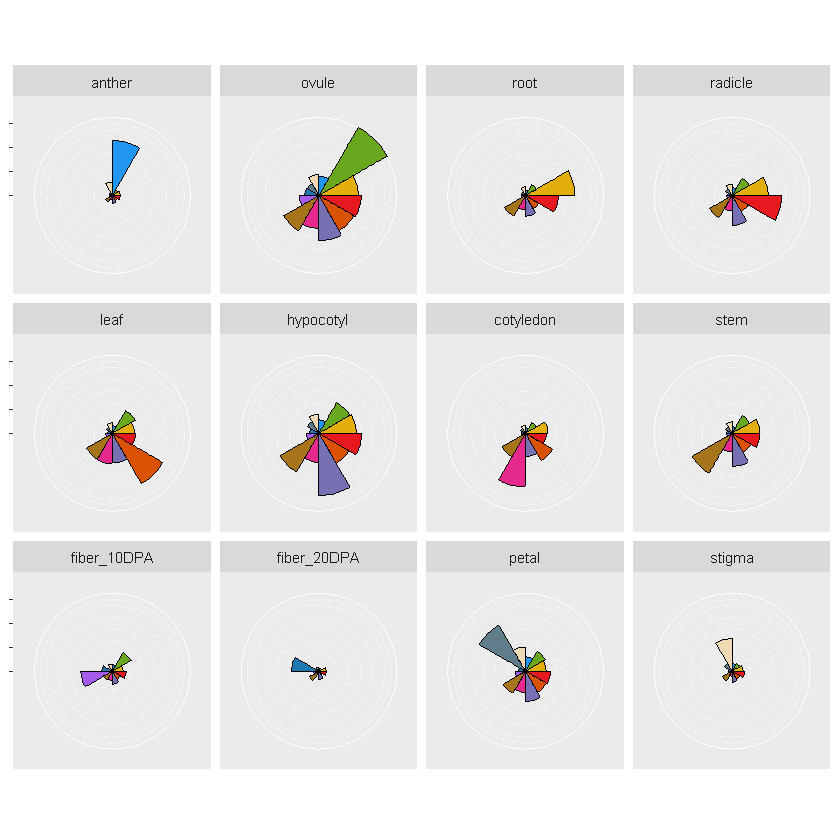

In [16]:
setwd('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TSG_TAD_TPM_median')
library(ggplot2)
df = read.csv("TSG_TAD_TPM_median.csv")
df <- within(df, tags<- factor(tags, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tags))
df <- within(df, tissues<- factor(tissues, levels = c('anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma')))
with(df, levels(tissues))

fg<- ggplot(df,aes(tissues,median_value)) +                       
     #geom_bar(aes(y=5.5,fill=tissues),stat="identity",width=1,colour="white",                 
     #         alpha=0.5) +                                                                         
 
     geom_hline(yintercept=0.5, colour="white",linetype="longdash",alpha=0.5)+
     geom_hline(yintercept=1.5, colour="white",linetype="longdash",alpha=0.5)+
     geom_hline(yintercept=2.5, colour="white",linetype="longdash",alpha=0.5)+ 
     geom_hline(yintercept=3.5, colour="white",linetype="longdash",alpha=0.5)+
     geom_hline(yintercept=4.5, colour="white",linetype="longdash",alpha=0.5)+
     geom_hline(yintercept=5.5, colour="white", linetype='longdash', alpha=0.5)+
     geom_hline(yintercept=6, colour="white", linetype='longdash', alpha=0.5)+           
     geom_hline(yintercept=6.5, colour="white")+           

     geom_bar(stat="identity",width=1,aes(fill=tissues),colour="black") + 
     coord_polar() +                                                                      
     #geom_label(aes(label=median_value,fill=tissues),size=2,color="white",show.legend = FALSE)+     
     # scale_fill_manual(values=c("Possession" = "#D70232",                                  
     #                            "Attacking" = "#1A78CF",
     #                            "Defending" = "#FF9300")) +                                                              
     # scale_y_continuous(limits = c(-10,100))+                                             
     #labs(fill="",                                                                       
     #     caption = "Data from StatsBomb via FBref")+                             
          #title=df_selected$Player[1])+                                           
     #theme_minimal() +
     facet_wrap(nrow=3, ~tags)+
     theme(
               axis.title.y = element_blank(),
               axis.title.x = element_blank(),
               axis.text.y = element_blank(),
               #axis.text.x = element_text(size = 6, angle = ),
               legend.position = 'none',
               axis.text.x = element_blank(),
               plot.title = element_text(hjust=0.5),
               plot.caption = element_text(hjust=0.5,size=6),
               panel.grid.major = element_blank(), 
               panel.grid.minor = element_blank())+
     scale_fill_manual(values=c("#2196F3", "#69A71E", "#E2AE09", "#E6191E", "#D95204", "#7571B2", "#E6298D", "#A6751B", "#A55CED", "#1E79B2" , "#607D8B", "#efdab4"))
fg
ggsave(plot =fg, filename = 'TSG_TAD_TPM_median.pdf', height = 5, width = 6)

In [2]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpCIZqVg\downloaded_packages
